# Fractopo – Fracture Network Analysis

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import geopandas as gpd

In [3]:
try:
    import fractopo
except ModuleNotFoundError:
    import sys

    sys.path.append("..")

In [4]:
from fractopo.analysis.network import Network
import fractopo.contour_grid as contour_grid
import matplotlib.pyplot as plt

plt.close()

## Data

Trace and target area data required. The paths can be urls to GeoJSON or local file paths to spatial filetypes (e.g. shapefile, geopackage). The name is used in plot labels and titles.

In [5]:
trace_data = ""
area_data = ""
name = ""

The defaults in the next cell are only applied if no parameters are given to the above cell.

In [6]:
if len(trace_data) == 0:
    # Set defaults
    # Trace and target area data available on GitHub
    trace_data = "https://raw.githubusercontent.com/nialov/fractopo/master/tests/sample_data/KB11/KB11_traces.geojson"
    area_data = "https://raw.githubusercontent.com/nialov/fractopo/master/tests/sample_data/KB11/KB11_area.geojson"

    # Name the dataset
    name = "KB11"

In [7]:
# Use geopandas to load data from urls
traces = gpd.read_file(trace_data)
area = gpd.read_file(area_data)

In [8]:
area.total_bounds

array([ 465993.9355, 6691562.9084,  466048.6197, 6691606.3108])

In [9]:
def focus_plot_to_bounds(ax, total_bounds):
    xmin, ymin, xmax, ymax = total_bounds
    extend_x = (xmax - xmin) * 0.05
    extend_y = (ymax - ymin) * 0.05
    ax.set_xlim(xmin - extend_x, xmax + extend_x)
    ax.set_ylim(ymin - extend_y, ymax + extend_y)
    return ax

## Visualizing trace map data

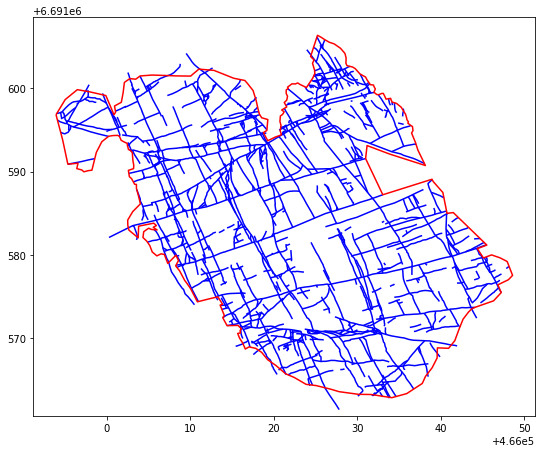

In [10]:
fix, ax = plt.subplots(figsize=(9, 9))
traces.plot(ax=ax, color="blue")
area.boundary.plot(ax=ax, color="red")
ax = focus_plot_to_bounds(ax, area.total_bounds)

## Create Network

In [11]:
# Create Network and automatically determine branches and nodes
network = Network(traces, area, name=name, determine_branches_nodes=True)

ERROR:root:Did not find 2 EXYI-nodes that intersected branch endpoints.

ERROR:root:Did not find 2 EXYI-nodes that intersected branch endpoints.

ERROR:root:Did not find 2 EXYI-nodes that intersected branch endpoints.



## Visualizing branches and nodes

In [12]:
from fractopo.general import CC_branch, CI_branch, II_branch, X_node, Y_node, I_node


# Function to determine color for each branch and node type
def assign_colors(feature_type: str):
    if feature_type in (CC_branch, X_node):
        return "green"
    if feature_type in (CI_branch, Y_node):
        return "blue"
    if feature_type in (II_branch, I_node):
        return "black"
    return "red"

| Branch or Node Type | Color |
|---------------------|-------|
| C - C, X            | Green |
| C - I, Y            | Blue  |
| I - I, I            | Black |
| Other               | Red   |

### Branches

<AxesSubplot:>

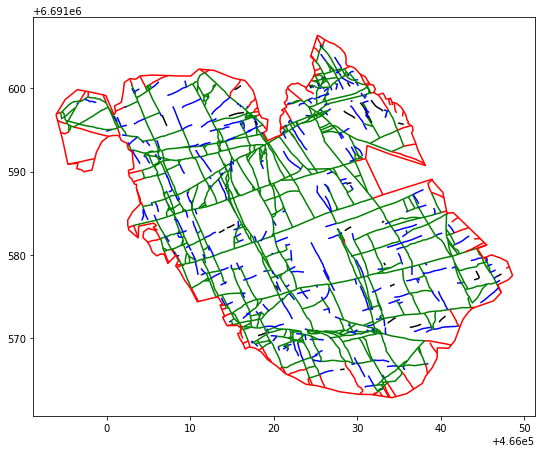

In [13]:
fix, ax = plt.subplots(figsize=(9, 9))
network.branch_gdf.plot(
    colors=[assign_colors(bt) for bt in network.branch_types], ax=ax
)
area.boundary.plot(ax=ax, color="red")

### Nodes

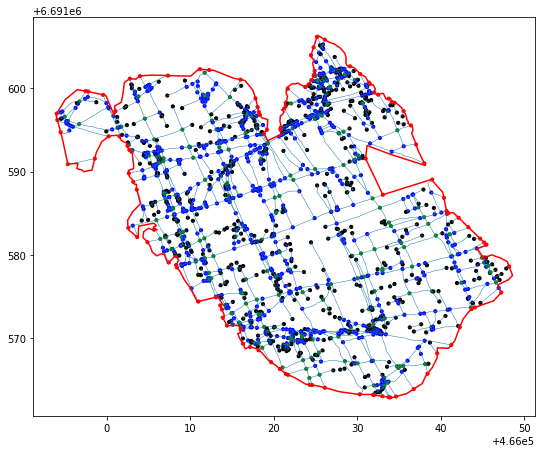

In [14]:
fix, ax = plt.subplots(figsize=(9, 9))
# Traces
network.trace_gdf.plot(ax=ax, linewidth=0.5)
# Nodes
network.node_gdf.plot(
    c=[assign_colors(bt) for bt in network.node_types], ax=ax, markersize=10
)
area.boundary.plot(ax=ax, color="red")
ax = focus_plot_to_bounds(ax, area.total_bounds)

## Rose plots

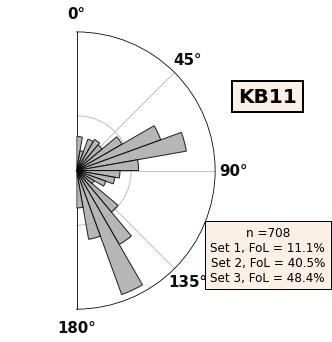

In [15]:
# Plot azimuth rose plot of fracture traces
azimuth_bin_dict, fig, ax = network.plot_trace_azimuth()

## Length distributions

In [16]:
# Fit for traces
fit_traces = network.trace_lengths_powerlaw_fit()

Calculating best minimal value for power law fit


In [17]:
# Automatically determined cut off
fit_traces.xmin

4.815579557192599

In [18]:
# Proportion of data cut by cut off (0-1)
network.trace_lengths_cut_off_proportion()

0.8813559322033898

In [19]:
# Power Law Exponent
-(fit_traces.alpha - 1)

-2.32350492303437

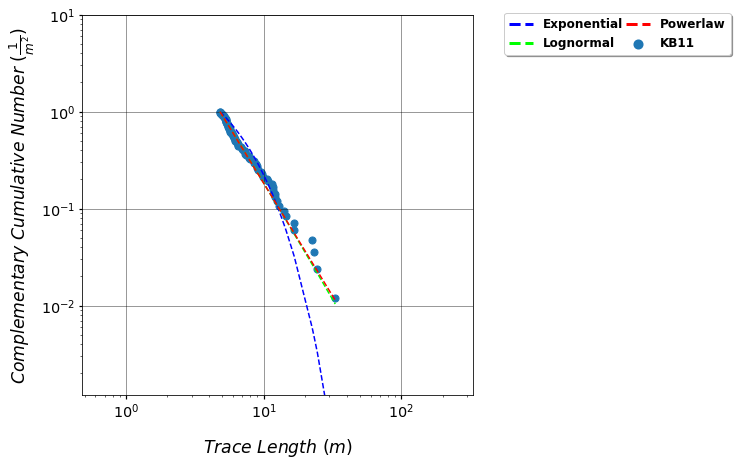

In [20]:
# Plot length distribution fits (powerlaw, exponential and lognormal) of fracture traces
fit, fig, ax = network.plot_trace_lengths()

In [21]:
# Fit for traces
fit_branches = network.branch_lengths_powerlaw_fit()

Calculating best minimal value for power law fit


In [22]:
# Automatically determined cut off
fit_branches.xmin

2.4602426465576075

In [23]:
# Proportion of data cut by cut off (0-1)
network.branch_lengths_cut_off_proportion()

0.948866377231066

In [24]:
# Power Law Exponent
-(fit_branches.alpha - 1)

-3.979095844593516

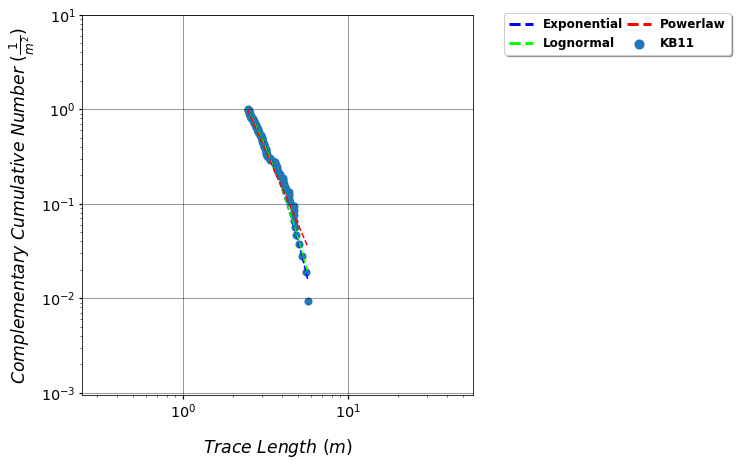

In [25]:
# Plot length distribution fits (powerlaw, exponential and lognormal) of fracture branches
fit, fig, ax = network.plot_branch_lengths()

In [26]:
# Fit properties
print(f"Automatically determined powerlaw cut-off: {fit.xmin}")
print(f"Powerlaw exponent: {fit.alpha - 1}")
print(
    f"Compare powerlaw fit to lognormal: R, p = {fit.distribution_compare('power_law', 'lognormal')}"
)

Automatically determined powerlaw cut-off: 2.4602426465576075
Powerlaw exponent: 3.979095844593516
Compare powerlaw fit to lognormal: R, p = (-1.564679594913648, 0.21188128044257792)


## Crosscutting and abutting relationships

In [27]:
# Sets are defaults
print(f"Azimuth set names: {network.azimuth_set_names}")
print(f"Azimuth set ranges: {network.azimuth_set_ranges}")

Azimuth set names: ('1', '2', '3')
Azimuth set ranges: ((0, 60), (60, 120), (120, 180))


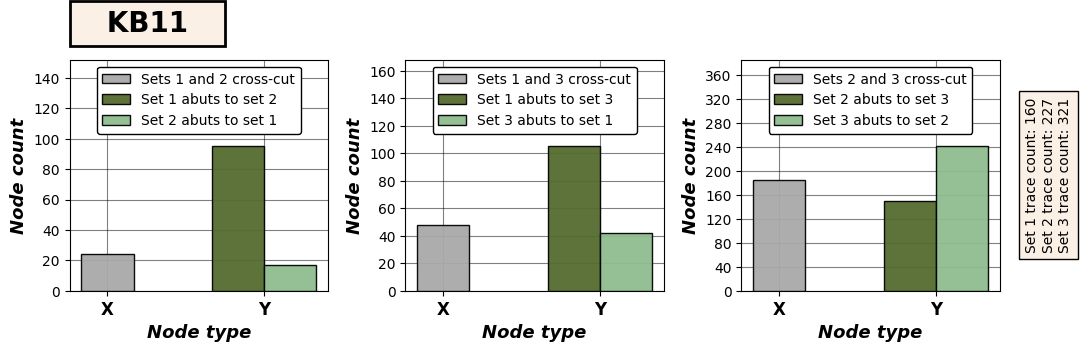

In [28]:
# Plot crosscutting and abutting relationships between azimuth sets
figs, fig_axes = network.plot_azimuth_crosscut_abutting_relationships()

## Node and branch proportions

In [29]:
network.node_counts

{'X': 273, 'Y': 821, 'I': 477, 'E': 114}

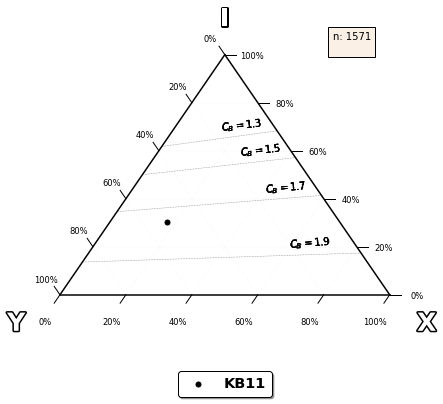

In [30]:
# Plot ternary XYI-node proportion plot
fig, ax, tax = network.plot_xyi()

In [31]:
network.branch_counts

{'C - C': 1522, 'C - I': 405, 'I - I': 30}

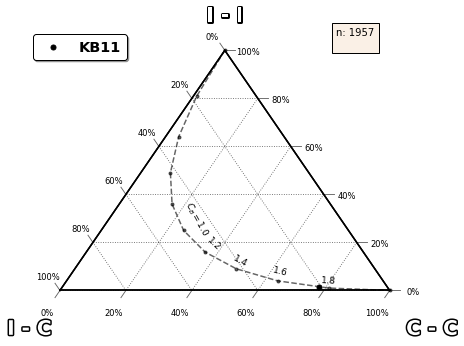

In [32]:
# Plot ternary branch (C-C, C-I, I-I) proportion plot
fig, ax, tax = network.plot_branch()

# General topological and geometric parameters

In [33]:
network.parameters

{'Number of Traces': 649.0,
 'Number of Branches': 2016.0,
 'Fracture Intensity B21': 1.2632712964363368,
 'Fracture Intensity P21': 1.2632712964363368,
 'Areal Frequency P20': 0.5242748269204643,
 'Areal Frequency B20': 1.6285640232228908,
 'Trace Mean Length': 2.2087627116170045,
 'Branch Mean Length': 0.75436758316641,
 'Dimensionless Intensity P22': 2.790266534224652,
 'Dimensionless Intensity B22': 0.9529709147761769,
 'Connections per Trace': 3.3713405238828966,
 'Connections per Branch': 1.7633928571428572,
 'Fracture Intensity (Mauldon)': 1.4357438039436288,
 'Fracture Density (Mauldon)': 0.5242748269204643,
 'Trace Mean Length (Mauldon)': 2.7385327889516233}

# Contour grids for target area

In [35]:
sampled_grid = contour_grid.run_grid_sampling(
    traces=network.trace_gdf,
    branches=network.branch_gdf,
    nodes=network.node_gdf,
    cell_width=1.0,
)

In [36]:
sampled_grid.columns

Index(['geometry', 'Sample_Area', 'Total_Length', 'Average_Trace_Length',
       'Average_Branch_Length', 'Branch_Frequency', 'Trace_Frequency',
       'Node_Frequency', 'P21', 'P22', 'B22', 'Connections_Per_Branch',
       'Connections_Per_Trace', 'Connection_Frequency'],
      dtype='object')

In [37]:
# From https://geopandas.org/mapping.html
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_contour(column: str):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sampled_grid.plot(
        column=column, legend=True, cax=cax, ax=ax, legend_kwds={"label": column}
    )

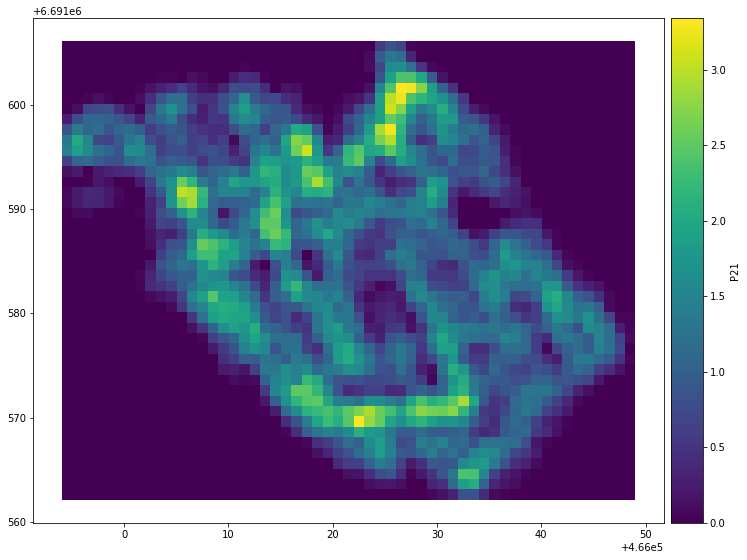

In [38]:
plot_contour("P21")

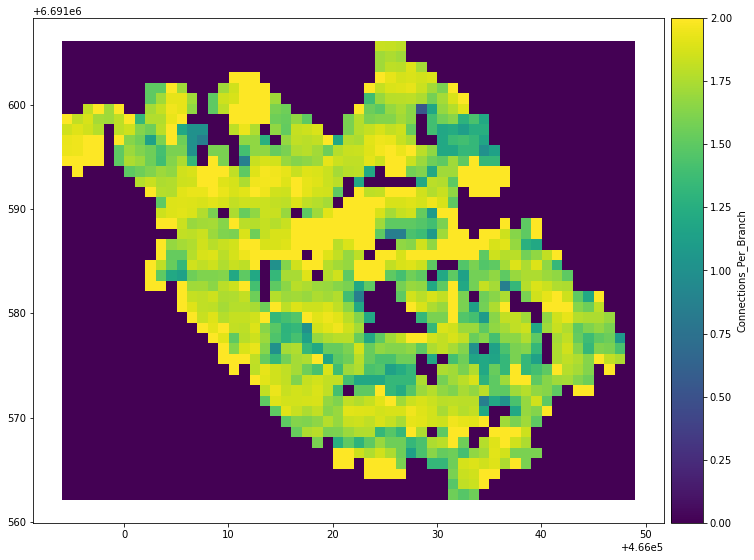

In [39]:
plot_contour("Connections_Per_Branch")